## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [0]:
train, test = keras.datasets.cifar10.load_data()

In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [0]:
from keras.layers import Dense, Input, Dropout
from keras.models import Model

def build_mlp(input_dim, dropout_rate, output_dim = 10, layers = [512, 256, 128, 64]):
  input_layer = Input(input_dim)
  for i, neurons in enumerate(layers):
    if i == 0:
      x = Dense(neurons, activation = 'relu')(input_layer)
      x = Dropout(dropout_rate)(x)
    else:
      x = Dense(neurons, activation = 'relu')(x)
      x = Dropout(dropout_rate)(x)
  out = Dense(output_dim, activation = 'softmax')(x)
  model = Model(input_layer, [out])
  return model

In [0]:
"""Code Here
設定超參數
"""
rates = [0.1, 0.2, 0.25, 0.3]

In [7]:

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for rate in rates:
  keras.backend.clear_session()

  model = build_mlp(x_train.shape[1:], dropout_rate = rate)
  model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = keras.optimizers.adam())

  model.summary()
  
  model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10, batch_size = 256, shuffle=True)

  acc = model.history.history['acc']
  val_acc = model.history.history['val_acc']
  loss = model.history.history['loss']
  val_loss = model.history.history['val_loss']

  results[rate] = {
      'acc' : acc,
      'val_acc' : val_acc,
      'loss' : loss, 
      'val_loss' : val_loss

  }






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
___

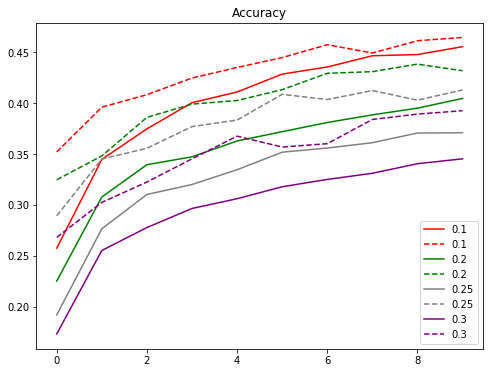

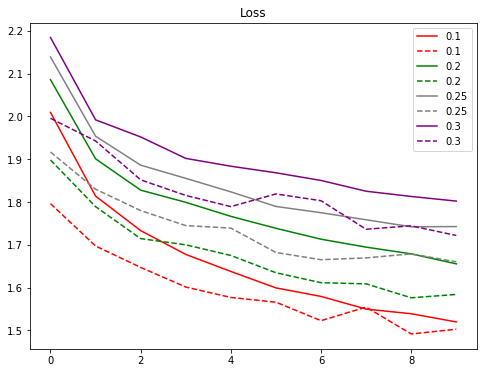

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
colors = ['r', 'g', 'gray', 'purple']

plt.figure(figsize = (8, 6))
for i, key in enumerate(results.keys()):
  plt.plot(range(len(results[key]['acc'])), results[key]['acc'], '-', color = colors[i], label = key)
  plt.plot(range(len(results[key]['val_acc'])), results[key]['val_acc'], '--', color = colors[i], label = key)
plt.title('Accuracy')
plt.legend()
plt.show()


plt.figure(figsize = (8, 6))
for i, key in enumerate(results.keys()):
  plt.plot(range(len(results[key]['loss'])), results[key]['loss'], '-', color = colors[i], label = key)
  plt.plot(range(len(results[key]['val_loss'])), results[key]['val_loss'], '--', color = colors[i], label = key)
plt.title('Loss')
plt.legend()
plt.show()